<a href="https://colab.research.google.com/github/AlexAlexeyuk/AlexAlexeyuk/blob/master/Alexeyuk_Spam_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель**: оценить работоспособность метода К-средних для классификации текста. Сравнить с другими методами классификации.
**Задачи**: 

1.   Сделать все буквы малыми
2.   Убрать "стоп слова"
3.   Провести стеммизацию
4.   Провести лемматизацию
5.   Оценить каком метод "очистки" слов более работоспособен
6.   Провести токенизацию
7.   Конвертировать слова в векторы
8.   Конвертировать слова в предложениях в векторы
9.   Кластеризовать данные
10.  Провести классификацию другими алгоритмами
11.  Попробовать авто_машинное обучение




In [270]:
import numpy as np
import pandas as pd
import re
import nltk
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = full_df.iloc[:,:2]
df = df.rename(columns={"v1":"target", "v2":"text"})

In [271]:
df["text"] = df["text"].str.lower()
df.head()

,target,text
0,ham,"go until jurong point, crazy.. available only in bugis n great wor..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives around here though"


In [272]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,text,text_wo_punct
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [273]:
stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, \
you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, \
she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, \
themselves, what, which, who, whom, this, that, that'll, these, those, am, is,\
 are, was, were, be, been, being, have, has, had, having, do, does, did, doing,\
  a, an, the, and, but, if, or, because, as, until, while, of, at, by, for,\
   with, about, against, between, into, through, during, before, after, above,\
    below, to, from, up, down, in, out, on, off, over, under, again, further, \
    then, once, here, there, when, where, why, how, all, any, both, each, few,\
     more, most, other, some, such, no, nor, not, only, own, same, so, than, \
     too, very, s, t, can, will, just, don, don't, should, should've, now, d, \
     ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, \
     doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, \
     ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't,\
      shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn,\
       wouldn't"


In [274]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in \
                     stopwords])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text:\
                                               remove_stopwords(text))
df.head()

,target,text,text_wo_punct,text_wo_stop
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though


In [275]:
df.groupby("target").describe()

text  ... text_wo_stop
       count  ...         freq
target        ...             
ham     4825  ...           30
spam     747  ...            4

[2 rows x 12 columns]

In [276]:
df['target'] = df['target'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(2)

,target,text,text_wo_punct,text_wo_stop
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni


In [277]:
df['length'] = df['text_wo_stop'].apply(len)

In [278]:
df.head(10)

,target,text,text_wo_punct,text_wo_stop,length
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...,113
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102


In [279]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('call', 576),
 ('2', 478),
 ('get', 386),
 ('4', 287),
 ('dont', 279),
 ('go', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257)]

In [280]:
def show_wordcloud(df, title):
    text = ' '.join(df['text_wo_stop'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

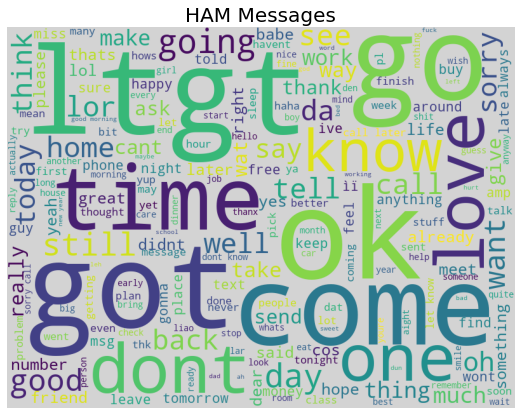

In [284]:
import wordcloud
import matplotlib.pyplot as plt
show_wordcloud(df[df['target']==0], "HAM Messages")

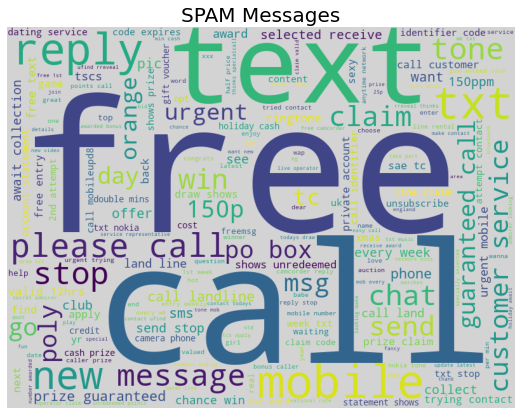

In [285]:
show_wordcloud(df[df['target']==1], "SPAM Messages")

In [286]:
from nltk.stem.porter import PorterStemmer


stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda text: stem_words(text))

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though


слова crazi, entri goe - признак, что данный алгоритм не очень подходит здесь, поэтому его использовать не буду

In [287]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


Другое дело с лемматизацией. 

In [288]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))

df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [289]:

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [290]:
data = df.drop(['text', 'text_stemmed', 'text_wo_punct', 'text_wo_stop', 'length' ], axis = 1)
data.head()

,target,text_lemmatized
0,0,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar joking wif oni
2,1,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,dun say early hor already say
4,0,nah dont think go usf life around though


In [291]:
#!pip install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 16 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_ihy66g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.084 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [292]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OKMeansEstimator

In [293]:
def tokenize(sentences, stop_word = stopwords):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | \
                                         (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",\
                                          invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) |\
                                      (~ tokenized_words.isin(stopwords)),:]
    return tokenized_words

In [295]:
# создаём н2о дата фрейм с колонками, которые нужны для дальнейшего анализа
df = h2o.H2OFrame(data, column_names=['target', 'text_lemmatized'],
                    column_types=["enum", "string"])
                            

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [297]:
words = tokenize(df["text_lemmatized"]) # токенизация

In [298]:
words.head()


C1
go
jurong
point
crazy
available
bugis
great
world
la
buffet


In [299]:
# Train Word2Vec Model for vec size = 100
w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [300]:
# визуально оценим работоспособность модели, получим 5 синонимов
w2v_model.find_synonyms("free", count = 5)

OrderedDict([('sub', 0.9359890222549438),
             ('mobile', 0.9279022216796875),
             ('colour', 0.9265287518501282),
             ('camcorder', 0.9247437119483948),
             ('unlimited', 0.9109144806861877)])

In [302]:
w2v_model.find_synonyms("hello", count = 5)

OrderedDict([('real', 0.8341214656829834),
             ('sound', 0.7780525088310242),
             ('name', 0.7714349031448364),
             ('also', 0.7362402081489563),
             ('girl', 0.7283552289009094)])

не фонтан, но некоторую логику проследить можно

In [303]:
word_embeddings = w2v_model.to_frame()
word_embeddings.head()

Word,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
ray,-0.0118536,-0.220062,-0.0309389,0.0283224,-0.0288348,-0.0266646,-0.0975313,-0.0738018,-0.127913,-0.0592438,-0.0685404,0.0127543,-0.0229703,0.0692523,-0.0134537,-0.0017508,0.00544518,-0.0488843,-0.101065,0.0152224,-0.0166916,-0.050789,0.0958788,0.0857008,-0.0900913,0.037723,0.114311,0.0292225,0.0311479,-0.107271,-0.0356418,0.0793311,0.0112682,0.120182,0.118568,0.0595821,-0.00928852,0.127542,0.146619,-0.00944932,-0.130816,0.14203,-0.0510436,-0.0772063,-0.0200711,0.077662,0.0543747,0.187331,-0.00753472,0.105321,-0.089053,-0.12458,-0.0141804,0.137859,-0.0352211,0.0786364,0.10361,-0.106646,-0.195141,0.153508,-0.104278,-0.123322,0.0864089,-0.00149515,-0.0353435,0.125086,0.167162,0.00788239,0.132203,-0.0520515,-0.0723421,0.0145152,0.128027,-0.0283413,-0.0609082,-0.136018,0.0396669,-0.051424,-0.0134649,-0.00484427,-0.0586426,-0.00757626,-0.011124,0.0374754,-0.0817544,0.0263,-0.0470493,-0.00897232,0.136759,0.00104732,0.0651535,0.0120215,0.042591,-0.0447827,-0.0548987,0.118423,-0.0372201,-0.0527533,-0.0516773,0.00830773
moral,0.0320783,-0.194208,-0.0717775,0.111345,0.0497201,-0.0715401,0.0248881,-0.0411075,-0.0904355,0.0214738,-0.0978288,0.0611395,0.0239175,-0.0840294,-0.0626345,-0.031276,-0.176037,0.0407884,0.0238558,-0.00617557,0.0151045,-0.136011,0.0214025,0.0136583,0.018317,-0.00352375,0.0595193,0.0182828,0.00485448,-0.0393022,-0.0200079,0.0659035,0.0389521,0.0298463,0.0342861,-0.0499715,-0.0559555,0.125276,0.0367874,-0.0183303,-0.09052,0.022516,-0.0484637,0.0339473,-0.0226131,-0.00712514,0.12995,0.130049,-0.0264181,0.181049,-0.0267163,-0.0119851,-0.0352593,0.0187949,0.0702408,-0.0775578,0.172899,-0.037663,0.0164243,0.0772436,-0.0877499,-0.0408559,0.162821,0.050945,-0.00526807,0.000740065,-0.16273,0.0525408,0.114551,0.0218633,-0.0677149,-0.0496838,0.0110912,0.00770032,-0.0957649,-0.120117,0.012798,0.0131281,-0.0490283,-0.0141242,-0.00280719,-0.0126801,0.0225481,-0.0598039,-0.00660724,0.0955068,0.01835,-0.0358739,0.01668,0.0208193,-0.0210794,-0.119034,0.0561559,0.0856624,0.0135955,0.040485,0.0341284,0.0455853,0.0431957,-0.0755615
wet,0.108719,-0.105764,-0.088066,0.100301,-0.0496912,-0.0292789,0.029264,-0.0552063,-0.0778544,-0.0565389,-0.0545876,-0.18681,-0.00270722,0.0230175,-0.00405666,-0.00473273,-0.124101,0.0152898,-0.00651841,-0.0258199,-0.0128683,-0.0251885,0.0831279,0.0453944,0.035962,0.0575883,-0.0502928,0.061053,-0.0339194,0.0173098,0.0364584,0.171093,-0.00108546,0.0168395,-0.0620876,-0.00866865,-0.00209015,0.0894458,0.101255,-0.111613,-0.222288,0.0238759,-0.037876,-0.00183669,0.0673864,0.0305997,0.112965,0.0609589,0.0249324,0.0886979,-0.0657749,-0.0649673,-0.0259533,0.018988,0.0456513,0.0852206,0.174885,-0.121595,0.0383881,-0.0225924,-0.110485,0.0787108,0.135882,-0.00806274,0.0412631,-0.00672521,-0.0117166,0.11719,-0.06084,0.00770787,-0.0646262,-0.0376706,-0.00443869,-0.0332661,-0.0420511,-0.126606,0.0806462,-0.0223181,0.0348399,0.0350941,-0.01207,0.0924337,-0.0179065,-0.0762356,0.0223018,0.0251201,-0.0289006,0.0681327,0.0387061,0.00383896,-0.0210578,-0.0945531,0.0037708,-0.0125612,0.0179918,0.0862014,-0.106429,-0.133177,0.0412967,-0.0389243
art,0.0449738,-0.0998976,-0.0607473,0.101424,0.0150037,-0.055488,0.0113699,-0.0174775,-0.0662787,-0.0224853,-0.0455869,-0.0387868,-0.0155219,-0.0194346,-0.0042625,-0.0408836,-0.0968753,-0.00524438,-0.0308181,-0.0220785,0.0308877,-0.062542,0.0651939,0.053174,0.0143374,0.0193643,0.0302174,0.0236516,-0.0261963,-0.00664776,-0.0126129,0.0791503,-0.011744,0.0555363,-0.0045289,0.00932331,-0.0457041,0.117881,0.0667782,-0.0385125,-0.109962,0.0495141,-0.0254129,-0.0096925,0.00479534,0.0156166,0.0713333,0

In [304]:

from h2o.estimators import H2OKMeansEstimator

kmeans = H2OKMeansEstimator(model_id = "word_segments.hex",
                            estimate_k = True, k = 2, # Max number of clusters
                            seed = 1234)

In [305]:
x = list(set(word_embeddings.col_names) - set(["Word"]))
kmeans.train(x = x, training_frame = word_embeddings)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [188]:

kmeans.centroid_stats()


Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,1159.0,62365.462301
1,,2.0,247.0,50868.879016


Довольно больние ошибки как мы видим

In [306]:
word_clusters = word_embeddings.cbind(kmeans.predict(word_embeddings))
word_clusters[["Word", "predict"]].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


Word,predict
ray,0
moral,0
wet,0
art,0
jazz,0
island,1
cartoon,0
bin,0
bar,0
plane,0


In [307]:
selected_words = ['2', 'get', 'ltgt',
 'ok',  'dont', 'go','know', 'got', 'like', 'call' ,'free', 'txt','mobile',
 'text', 'claim', 'stop', 'reply'] # топ 10 слов из каждой выборки (спам, не спам)
selected_clusters = word_clusters[word_clusters["Word"].isin(selected_words)]

In [308]:
print("Cluster 1")
print(selected_clusters[selected_clusters["predict"] == 0, "Word"])

Cluster 1


Word
like
ltgt
ok
dont
know
go
get


In [309]:
print("Cluster 2")
print(selected_clusters[selected_clusters["predict"] == 1, "Word"])

Cluster 2


Word
claim
mobile
reply
stop
txt
text
free
call


In [311]:
# посчитаем векторы каждого сообщения
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

In [312]:
review_vecs.dim

[5572, 100]

In [313]:
type(df)

h2o.frame.H2OFrame

In [314]:
# Add aggregated word embeddings 
ext_df = df.cbind(review_vecs)

In [315]:
train,test  = ext_df.split_frame(ratios=[.8]) # сплит 80 на 20

In [316]:
train.dim

[4466, 102]

In [317]:
test.dim

[1106, 102]

In [319]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = review_vecs.names
response = 'target'
# научим GBM
gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_embeddings.hex", ntrees = 1000,
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [320]:
gbm_embeddings.auc

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_embeddings.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,140.0,140.0,45133.0,5.0,5.0,5.0,9.0,30.0,20.957144




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0003683346722909214
RMSE: 0.019192047110480982
LogLoss: 0.004544376337457921
Mean Per-Class Error: 0.0008635578583764403
AUC: 0.9999351276319408
AUCPR: 0.9996531675290508
Gini: 0.9998702552638816

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.765926989265472: 


,,0,1,Error,Rate
0,0,3887.0,0.0,0.0,(0.0/3887.0)
1,1,1.0,578.0,0.0017,(1.0/579.0)
2,Total,3888.0,578.0,0.0002,(1.0/4466.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.765927,0.999136,170.0
1,max f2,0.765927,0.998618,170.0
2,max f0point5,0.765927,0.999654,170.0
3,max accuracy,0.765927,0.999776,170.0
4,max precision,0.999690,1.000000,0.0
5,max recall,0.013252,1.000000,237.0
6,max specificity,0.999690,1.000000,0.0
7,max absolute_mcc,0.765927,0.999008,170.0
8,max min_per_class_accuracy,0.765927,0.998273,170.0
9,max mean_per_class_accuracy,0.765927,0.999136,170.0



Gains/Lift Table: Avg response rate: 12.96 %, avg score: 12.97 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010076,0.999442,7.713299,7.713299,1.000000,0.999580,1.000000,0.999580,0.077720,0.077720,671.329879,671.329879,0.077720
1,2,0.020824,0.999157,7.713299,7.713299,1.000000,0.999302,1.000000,0.999436,0.082902,0.160622,671.329879,671.329879,0.160622
2,3,0.030004,0.998854,7.713299,7.713299,1.000000,0.999012,1.000000,0.999306,0.070812,0.231434,671.329879,671.329879,0.231434
3,4,0.040081,0.998608,7.713299,7.713299,1.000000,0.998729,1.000000,0.999161,0.077720,0.309154,671.329879,671.329879,0.309154
4,5,0.050381,0.998115,7.713299,7.713299,1.000000,0.998384,1.000000,0.999002,0.079447,0.388601,671.329879,671.329879,0.388601
5,6,0.100090,0.988863,7.713299,7.713299,1.000000,0.995383,1.000000,0.997205,0.383420,0.772021,671.329879,671.329879,0.772021
6,7,0.150022,0.014721,4.531131,6.654159,0.587444,0.571166,0.862687,0.855404,0.226252,0.998273,353.113068,565.415926,0.974604
7,8,0.200179,0.007152,0.034434,4.995526,0.004464,0.011163,0.647651,0.643872,0.001727,1.000000,-96.556563,399.552573,0.918961
8,9,0.300045,0.002122,0.000000,3.332836,0.000000,0.003764,0.432090,0.430821,0.000000,1.000000,-100.000000,233.283582,0.804219
9,10,0.400134,0.001126,0.000000,2.499161,0.000000,0.001534,0.324007,0.323439,0.000000,1.000000,-100.000000,149.916060,0.689220




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.019366645987931256
RMSE: 0.13916409733811108
LogLoss: 0.08402185061586737
Mean Per-Class Error: 0.0431769722814499
AUC: 0.9881809066910346
AUCPR: 0.9671857214147428
Gini: 0.9763618133820693

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5625728611801384: 


,,0,1,Error,Rate
0,0,934.0,4.0,0.0043,(4.0/938.0)
1,1,19.0,149.0,0.1131,(19.0/168.0)
2,Total,953.0,153.0,0.0208,(23.0/1106.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.562573,0.928349,119.0
1,max f2,0.114860,0.926366,136.0
2,max f0point5,0.732880,0.955497,115.0
3,max accuracy,0.562573,0.979204,119.0
4,max precision,0.999723,1.000000,0.0
5,max recall,0.000652,1.000000,340.0
6,max specificity,0.999723,1.000000,0.0
7,max absolute_mcc,0.562573,0.917588,119.0
8,max min_per_class_accuracy,0.016918,0.948827,173.0
9,max mean_per_class_accuracy,0.114860,0.956823,136.0



Gains/Lift Table: Avg response rate: 15.19 %, avg score: 14.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010850,0.999449,6.583333,6.583333,1.000000,0.999579,1.000000,0.999579,0.071429,0.071429,558.333333,558.333333,0.071429
1,2,0.020796,0.999198,6.583333,6.583333,1.000000,0.999337,1.000000,0.999463,0.065476,0.136905,558.333333,558.333333,0.136905
2,3,0.030741,0.998826,6.583333,6.583333,1.000000,0.999032,1.000000,0.999324,0.065476,0.202381,558.333333,558.333333,0.202381
3,4,0.040687,0.998424,6.583333,6.583333,1.000000,0.998608,1.000000,0.999149,0.065476,0.267857,558.333333,558.333333,0.267857
4,5,0.050633,0.997700,6.583333,6.583333,1.000000,0.998100,1.000000,0.998943,0.065476,0.333333,558.333333,558.333333,0.333333
5,6,0.100362,0.982077,6.583333,6.583333,1.000000,0.994152,1.000000,0.996569,0.327381,0.660714,558.333333,558.333333,0.660714
6,7,0.150090,0.132138,5.146970,6.107430,0.781818,0.754017,0.927711,0.916205,0.255952,0.916667,414.696970,510.742972,0.903873
7,8,0.216094,0.013251,0.631279,4.434798,0.095890,0.037015,0.673640,0.647666,0.041667,0.958333,-36.872146,343.479777,0.875178
8,9,0.300181,0.003053,0.212366,3.252008,0.032258,0.005807,0.493976,0.467868,0.017857,0.976190,-78.763441,225.200803,0.797086
9,10,0.400542,0.001270,0.118619,2.466892,0.018018,0.001961,0.374718,0.351129,0.011905,0.988095,-88.138138,146.689240,0.692786




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 15:30:25,0.057 sec,0.0,0.335914,0.385714,0.500000,0.129646,1.000000,0.870354,0.359612,0.428084,0.500000,0.151899,1.000000,0.848101
1,,2020-11-14 15:30:25,0.637 sec,10.0,0.169814,0.133145,0.989516,0.964939,7.664013,0.019257,0.202970,0.166790,0.981613,0.940813,6.489286,0.032550
2,,2020-11-14 15:30:26,1.165 sec,20.0,0.124154,0.079737,0.990705,0.974396,7.713299,0.015898,0.166415,0.117396,0.982730,0.945663,6.583333,0.028029
3,,2020-11-14 15:30:26,1.833 sec,30.0,0.104657,0.057141,0.992715,0.980477,7.713299,0.010972,0.153775,0.097977,0.985522,0.954788,6.583333,0.026221
4,,2020-11-14 15:30:27,2.350 sec,40.0,0.094013,0.045325,0.995584,0.985282,7.713299,0.007613,0.147942,0.089165,0.985934,0.959226,6.583333,0.023508
5,,2020-11-14 15:30:27,2.862 sec,50.0,0.084458,0.036033,0.997906,0.991086,7.713299,0.006046,0.144183,0.083647,0.987340,0.962970,6.583333,0.022604
6,,2020-11-14 15:30:28,3.452 sec,60.0,0.072583,0.027333,0.999067,0.996029,7.713299,0.004702,0.141491,0.080303,0.988400,0.964972,6.583333,0.021700
7,,2020-11-14 15:30:29,4.017 sec,70.0,0.061291,0.020995,0.999565,0.998379,7.713299,0.002911,0.139822,0.078312,0.988876,0.966207,6.583333,0.022604
8,,2020-11-14 15:30:29,4.574 sec,80.0,0.049762,0.016024,0.999763,0.999115,7.713299,0.000448,0.139382,0.077774,0.989193,0.966838,6.583333,0.022604
9,,2020-11-14 15:30:30,5.090 sec,90.0,0.040503,0.012406,0.999810,0.999267,7.713299,0.000224,0.139416,0.078773,0.988847,0.966261,6.583333,0.021700



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C59,1174.003174,1.000000,0.509005
1,C25,391.987091,0.333889,0.169951
2,C44,158.423141,0.134943,0.068687
3,C86,36.442699,0.031041,0.015800
4,C27,36.392647,0.030999,0.015779
5,C20,34.144032,0.029083,0.014804
6,C74,30.295708,0.025805,0.013135
7,C62,29.290939,0.024950,0.012699
8,C42,21.583248,0.018384,0.009358
9,C87,19.560959,0.016662,0.008481



See the whole table with table.as_data_frame()


<bound method ModelBase.auc of >

АУК более 98 %, чт вполне себе неплохо

In [321]:
gbm_embeddings.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5625728611801384: 


,,0,1,Error,Rate
0,0,934.0,4.0,0.0043,(4.0/938.0)
1,1,19.0,149.0,0.1131,(19.0/168.0)
2,Total,953.0,153.0,0.0208,(23.0/1106.0)


Высокая чувствительность и специфичность, что не может не радовать

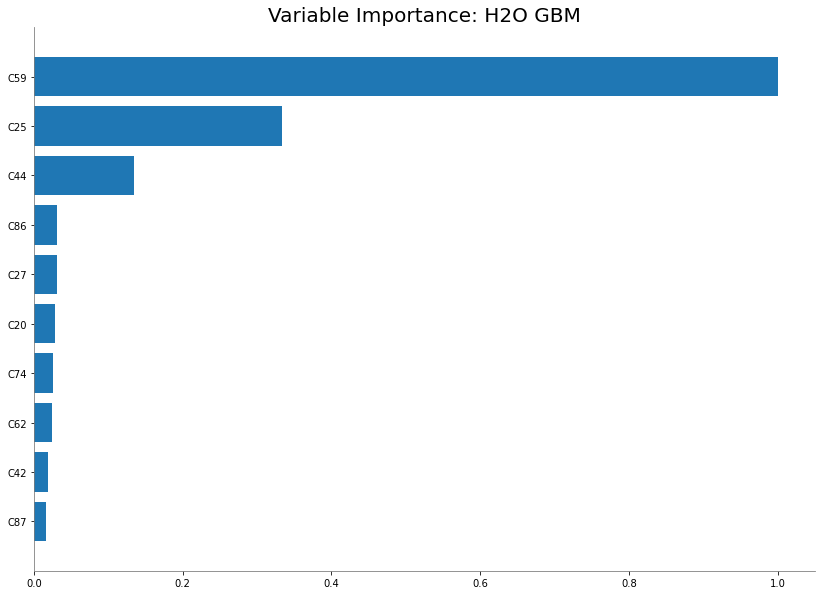

In [322]:
gbm_embeddings.varimp_plot()



Посмотрим наиболее важные признаки для постоения модели и выделим топ



In [323]:
top_w2v_features = list(filter(lambda x: x.startswith('C'), map(lambda x: x[0], gbm_embeddings.varimp())))[1:10]
top_w2v_features

['C25', 'C44', 'C86', 'C27', 'C20', 'C74', 'C62', 'C42', 'C87']

In [324]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_predictors =  review_vecs.names

glm_embeddings = H2OGeneralizedLinearEstimator(model_id = "glm_embeddings.hex", interactions = top_w2v_features,
                                               family = "binomial"
                                              )
glm_embeddings.train(x = glm_predictors, y = response,
                     training_frame = train, validation_frame = test
                    )

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [325]:
print(glm_embeddings.auc)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_embeddings.hex


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.836E-4 )",136,71,7,py_198_sid_8fe9




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.024777918542367442
RMSE: 0.15741003316932323
LogLoss: 0.0914118791556778
Null degrees of freedom: 4465
Residual degrees of freedom: 4394
Null deviance: 3445.1940847226656
Residual deviance: 816.4909046185142
AIC: 960.4909046185142
AUC: 0.9839269821507678
AUCPR: 0.940510958100378
Gini: 0.9678539643015356

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5755290375333472: 


,,0,1,Error,Rate
0,0,3848.0,39.0,0.01,(39.0/3887.0)
1,1,95.0,484.0,0.1641,(95.0/579.0)
2,Total,3943.0,523.0,0.03,(134.0/4466.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.575529,0.878403,147.0
1,max f2,0.142572,0.896766,256.0
2,max f0point5,0.655482,0.910680,132.0
3,max accuracy,0.575529,0.969996,147.0
4,max precision,0.999799,1.000000,0.0
5,max recall,0.001046,1.000000,392.0
6,max specificity,0.999799,1.000000,0.0
7,max absolute_mcc,0.575529,0.862789,147.0
8,max min_per_class_accuracy,0.142572,0.948187,256.0
9,max mean_per_class_accuracy,0.142572,0.948881,256.0



Gains/Lift Table: Avg response rate: 12.96 %, avg score: 12.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010076,9.988508e-01,7.713299,7.713299,1.000000,0.999689,1.000000,0.999689,0.077720,0.077720,671.329879,671.329879,0.077720
1,2,0.020600,9.944247e-01,7.713299,7.713299,1.000000,0.996586,1.000000,0.998104,0.081174,0.158895,671.329879,671.329879,0.158895
2,3,0.030004,9.907431e-01,7.713299,7.713299,1.000000,0.992855,1.000000,0.996459,0.072539,0.231434,671.329879,671.329879,0.231434
3,4,0.040528,9.815035e-01,7.713299,7.713299,1.000000,0.985631,1.000000,0.993647,0.081174,0.312608,671.329879,671.329879,0.312608
4,5,0.050157,9.648635e-01,7.713299,7.713299,1.000000,0.973594,1.000000,0.989798,0.074266,0.386874,671.329879,671.329879,0.386874
5,6,0.100090,7.486034e-01,6.952346,7.333673,0.901345,0.882582,0.950783,0.936310,0.347150,0.734024,595.234555,633.367335,0.728364
6,7,0.150022,2.081748e-01,3.562645,6.078540,0.461883,0.467174,0.788060,0.780165,0.177893,0.911917,256.264473,507.853994,0.875385
7,8,0.200179,7.276407e-02,0.964162,4.797085,0.125000,0.125162,0.621924,0.616048,0.048359,0.960276,-3.583765,379.708515,0.873320
8,9,0.300493,1.897528e-02,0.172172,3.253150,0.022321,0.037062,0.421759,0.422765,0.017271,0.977547,-82.782815,225.314986,0.777908
9,10,0.400134,9.158175e-03,0.138666,2.477579,0.017978,0.012753,0.321209,0.320663,0.013817,0.991364,-86.133395,147.757891,0.679299




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.032542071356144994
RMSE: 0.18039421098290542
LogLoss: 0.1119993794091387
Null degrees of freedom: 1105
Residual degrees of freedom: 1034
Null deviance: 946.9227617257346
Residual deviance: 247.74262725301477
AIC: 391.7426272530148
AUC: 0.9844273530307646
AUCPR: 0.9318881038298535
Gini: 0.9688547060615291

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3937733901233267: 


,,0,1,Error,Rate
0,0,918.0,20.0,0.0213,(20.0/938.0)
1,1,25.0,143.0,0.1488,(25.0/168.0)
2,Total,943.0,163.0,0.0407,(45.0/1106.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.393773,0.864048,129.0
1,max f2,0.133120,0.896708,174.0
2,max f0point5,0.651125,0.891854,104.0
3,max accuracy,0.393773,0.959313,129.0
4,max precision,0.999983,1.000000,0.0
5,max recall,0.004797,1.000000,338.0
6,max specificity,0.999983,1.000000,0.0
7,max absolute_mcc,0.393773,0.840264,129.0
8,max min_per_class_accuracy,0.133120,0.940476,174.0
9,max mean_per_class_accuracy,0.133120,0.943053,174.0



Gains/Lift Table: Avg response rate: 15.19 %, avg score: 14.27 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010850,9.996567e-01,6.583333,6.583333,1.000000,0.999849,1.000000,0.999849,0.071429,0.071429,558.333333,558.333333,0.071429
1,2,0.020796,9.981494e-01,6.583333,6.583333,1.000000,0.998791,1.000000,0.999343,0.065476,0.136905,558.333333,558.333333,0.136905
2,3,0.030741,9.941609e-01,6.583333,6.583333,1.000000,0.996395,1.000000,0.998389,0.065476,0.202381,558.333333,558.333333,0.202381
3,4,0.040687,9.893155e-01,5.984848,6.437037,0.909091,0.991809,0.977778,0.996781,0.059524,0.261905,498.484848,543.703704,0.260839
4,5,0.050633,9.808518e-01,6.583333,6.465774,1.000000,0.983680,0.982143,0.994208,0.065476,0.327381,558.333333,546.577381,0.326315
5,6,0.100362,8.349804e-01,6.104545,6.286787,0.927273,0.918186,0.954955,0.956539,0.303571,0.630952,510.454545,528.678679,0.625622
6,7,0.150090,3.765142e-01,4.428788,5.671185,0.672727,0.600765,0.861446,0.838662,0.220238,0.851190,342.878788,467.118474,0.826670
7,8,0.200723,1.035187e-01,1.880952,4.715090,0.285714,0.201866,0.716216,0.678029,0.095238,0.946429,88.095238,371.509009,0.879264
8,9,0.300181,1.902980e-02,0.418939,3.291667,0.063636,0.042219,0.500000,0.467369,0.041667,0.988095,-58.106061,229.166667,0.811123
9,10,0.401447,8.661471e-03,0.058780,2.476164,0.008929,0.012110,0.376126,0.352529,0.005952,0.994048,-94.122024,147.616366,0.698738




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 15:32:48,0.000 sec,0,1722.597042,0.385714,,,,,,,,,,,,,,
1,,2020-11-14 15:32:48,0.232 sec,1,631.521576,0.146356,,,,,,,,,,,,,,
2,,2020-11-14 15:32:48,0.352 sec,2,499.334996,0.117945,,,,,,,,,,,,,,
3,,2020-11-14 15:32:49,0.462 sec,3,427.175548,0.102418,,,,,,,,,,,,,,
4,,2020-11-14 15:32:49,0.561 sec,4,411.328094,0.099539,,,,,,,,,,,,,,
5,,2020-11-14 15:32:49,0.676 sec,5,408.419534,0.099120,,,,,,,,,,,,,,
6,,2020-11-14 15:32:49,0.778 sec,6,408.225279,0.099094,,,,,,,,,,,,,,
7,,2020-11-14 15:32:49,0.910 sec,7,408.245452,0.099095,0.15741,0.0914119,0.780412,NaN,NaN,7.7133,0.0300045,0.180394,0.111999,0.747394,0.984427,0.931888,6.58333,0.0406872


<bound method ModelBase.auc of >


In [207]:
glm_embeddings.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5998123442382717: 


,,0,1,Error,Rate
0,0,955.0,12.0,0.0124,(12.0/967.0)
1,1,22.0,127.0,0.1477,(22.0/149.0)
2,Total,977.0,139.0,0.0305,(34.0/1116.0)


In [326]:
glm_embeddings.auc

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_embeddings.hex


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.836E-4 )",136,71,7,py_198_sid_8fe9




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.024777918542367442
RMSE: 0.15741003316932323
LogLoss: 0.0914118791556778
Null degrees of freedom: 4465
Residual degrees of freedom: 4394
Null deviance: 3445.1940847226656
Residual deviance: 816.4909046185142
AIC: 960.4909046185142
AUC: 0.9839269821507678
AUCPR: 0.940510958100378
Gini: 0.9678539643015356

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5755290375333472: 


,,0,1,Error,Rate
0,0,3848.0,39.0,0.01,(39.0/3887.0)
1,1,95.0,484.0,0.1641,(95.0/579.0)
2,Total,3943.0,523.0,0.03,(134.0/4466.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.575529,0.878403,147.0
1,max f2,0.142572,0.896766,256.0
2,max f0point5,0.655482,0.910680,132.0
3,max accuracy,0.575529,0.969996,147.0
4,max precision,0.999799,1.000000,0.0
5,max recall,0.001046,1.000000,392.0
6,max specificity,0.999799,1.000000,0.0
7,max absolute_mcc,0.575529,0.862789,147.0
8,max min_per_class_accuracy,0.142572,0.948187,256.0
9,max mean_per_class_accuracy,0.142572,0.948881,256.0



Gains/Lift Table: Avg response rate: 12.96 %, avg score: 12.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010076,9.988508e-01,7.713299,7.713299,1.000000,0.999689,1.000000,0.999689,0.077720,0.077720,671.329879,671.329879,0.077720
1,2,0.020600,9.944247e-01,7.713299,7.713299,1.000000,0.996586,1.000000,0.998104,0.081174,0.158895,671.329879,671.329879,0.158895
2,3,0.030004,9.907431e-01,7.713299,7.713299,1.000000,0.992855,1.000000,0.996459,0.072539,0.231434,671.329879,671.329879,0.231434
3,4,0.040528,9.815035e-01,7.713299,7.713299,1.000000,0.985631,1.000000,0.993647,0.081174,0.312608,671.329879,671.329879,0.312608
4,5,0.050157,9.648635e-01,7.713299,7.713299,1.000000,0.973594,1.000000,0.989798,0.074266,0.386874,671.329879,671.329879,0.386874
5,6,0.100090,7.486034e-01,6.952346,7.333673,0.901345,0.882582,0.950783,0.936310,0.347150,0.734024,595.234555,633.367335,0.728364
6,7,0.150022,2.081748e-01,3.562645,6.078540,0.461883,0.467174,0.788060,0.780165,0.177893,0.911917,256.264473,507.853994,0.875385
7,8,0.200179,7.276407e-02,0.964162,4.797085,0.125000,0.125162,0.621924,0.616048,0.048359,0.960276,-3.583765,379.708515,0.873320
8,9,0.300493,1.897528e-02,0.172172,3.253150,0.022321,0.037062,0.421759,0.422765,0.017271,0.977547,-82.782815,225.314986,0.777908
9,10,0.400134,9.158175e-03,0.138666,2.477579,0.017978,0.012753,0.321209,0.320663,0.013817,0.991364,-86.133395,147.757891,0.679299




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.032542071356144994
RMSE: 0.18039421098290542
LogLoss: 0.1119993794091387
Null degrees of freedom: 1105
Residual degrees of freedom: 1034
Null deviance: 946.9227617257346
Residual deviance: 247.74262725301477
AIC: 391.7426272530148
AUC: 0.9844273530307646
AUCPR: 0.9318881038298535
Gini: 0.9688547060615291

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3937733901233267: 


,,0,1,Error,Rate
0,0,918.0,20.0,0.0213,(20.0/938.0)
1,1,25.0,143.0,0.1488,(25.0/168.0)
2,Total,943.0,163.0,0.0407,(45.0/1106.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.393773,0.864048,129.0
1,max f2,0.133120,0.896708,174.0
2,max f0point5,0.651125,0.891854,104.0
3,max accuracy,0.393773,0.959313,129.0
4,max precision,0.999983,1.000000,0.0
5,max recall,0.004797,1.000000,338.0
6,max specificity,0.999983,1.000000,0.0
7,max absolute_mcc,0.393773,0.840264,129.0
8,max min_per_class_accuracy,0.133120,0.940476,174.0
9,max mean_per_class_accuracy,0.133120,0.943053,174.0



Gains/Lift Table: Avg response rate: 15.19 %, avg score: 14.27 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010850,9.996567e-01,6.583333,6.583333,1.000000,0.999849,1.000000,0.999849,0.071429,0.071429,558.333333,558.333333,0.071429
1,2,0.020796,9.981494e-01,6.583333,6.583333,1.000000,0.998791,1.000000,0.999343,0.065476,0.136905,558.333333,558.333333,0.136905
2,3,0.030741,9.941609e-01,6.583333,6.583333,1.000000,0.996395,1.000000,0.998389,0.065476,0.202381,558.333333,558.333333,0.202381
3,4,0.040687,9.893155e-01,5.984848,6.437037,0.909091,0.991809,0.977778,0.996781,0.059524,0.261905,498.484848,543.703704,0.260839
4,5,0.050633,9.808518e-01,6.583333,6.465774,1.000000,0.983680,0.982143,0.994208,0.065476,0.327381,558.333333,546.577381,0.326315
5,6,0.100362,8.349804e-01,6.104545,6.286787,0.927273,0.918186,0.954955,0.956539,0.303571,0.630952,510.454545,528.678679,0.625622
6,7,0.150090,3.765142e-01,4.428788,5.671185,0.672727,0.600765,0.861446,0.838662,0.220238,0.851190,342.878788,467.118474,0.826670
7,8,0.200723,1.035187e-01,1.880952,4.715090,0.285714,0.201866,0.716216,0.678029,0.095238,0.946429,88.095238,371.509009,0.879264
8,9,0.300181,1.902980e-02,0.418939,3.291667,0.063636,0.042219,0.500000,0.467369,0.041667,0.988095,-58.106061,229.166667,0.811123
9,10,0.401447,8.661471e-03,0.058780,2.476164,0.008929,0.012110,0.376126,0.352529,0.005952,0.994048,-94.122024,147.616366,0.698738




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 15:32:48,0.000 sec,0,1722.597042,0.385714,,,,,,,,,,,,,,
1,,2020-11-14 15:32:48,0.232 sec,1,631.521576,0.146356,,,,,,,,,,,,,,
2,,2020-11-14 15:32:48,0.352 sec,2,499.334996,0.117945,,,,,,,,,,,,,,
3,,2020-11-14 15:32:49,0.462 sec,3,427.175548,0.102418,,,,,,,,,,,,,,
4,,2020-11-14 15:32:49,0.561 sec,4,411.328094,0.099539,,,,,,,,,,,,,,
5,,2020-11-14 15:32:49,0.676 sec,5,408.419534,0.099120,,,,,,,,,,,,,,
6,,2020-11-14 15:32:49,0.778 sec,6,408.225279,0.099094,,,,,,,,,,,,,,
7,,2020-11-14 15:32:49,0.910 sec,7,408.245452,0.099095,0.15741,0.0914119,0.780412,NaN,NaN,7.7133,0.0300045,0.180394,0.111999,0.747394,0.984427,0.931888,6.58333,0.0406872


<bound method ModelBase.auc of >

AUC - 98 % и гораздо быстрее

In [327]:
kmeans.train(x=predictors,
            training_frame=train,
            validation_frame=test)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [328]:
pred = kmeans.predict(test)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [329]:
pred

predict
0
1
1
1
0
0
0
1
0
0


In [330]:
test['labels'] =  pred

In [331]:
test.head(10)

target,text_lemmatized,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,labels
0,even brother like speak treat like aid patent,0.0187363,-0.213474,-0.0230581,0.0399962,0.00971322,-0.0746019,-0.0693461,-0.0318814,-0.0770302,0.0035443,-0.0286316,0.0703656,-0.00899721,-0.0146578,0.00492116,0.00127376,0.0142949,0.0252673,0.00170639,-0.0208296,0.0052725,-0.0583681,0.0548168,0.102965,-0.0253325,0.0554888,0.0707791,-0.0270025,-0.00306281,0.00573641,-0.0620682,0.0642193,0.0264941,0.165385,0.00522382,0.0110674,-0.0938482,0.0821353,0.133456,-0.0586324,-0.16387,0.0435066,-0.0263505,-0.0670235,-0.0231886,-0.016616,0.0964805,0.117623,0.0011982,0.120167,-0.0179657,-0.0104844,-0.0024472,0.00052411,0.0361659,-0.0273339,0.16082,-0.0888318,-0.115521,0.0243658,-0.114811,-0.010215,0.098927,0.0699802,0.00182653,-0.00296486,0.0689617,-0.0262752,0.0660821,-0.0431255,-0.0134085,-0.0467764,0.0550096,-0.0204658,-0.0322264,-0.150735,0.053419,-0.021733,-0.0373599,-0.0536241,-0.00153049,-0.0210636,-0.0302909,0.0562321,-0.0432216,0.0519216,-0.0294889,0.0284205,0.0633253,-0.00574659,0.0457396,-0.0736322,0.0385868,0.0279047,0.00183484,0.104348,-0.0217505,-0.069485,0.0357553,-0.0468063,0
1,urgent 1 week free membership å£100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18,0.0992233,0.00488591,-0.415131,0.180389,0.112092,-0.0399026,0.0495597,-0.0982733,-0.0492966,-0.0652052,-0.0699109,-0.114126,-0.0228081,-0.190014,-0.0252032,-0.038076,-0.2937,0.166064,0.21202,0.0817373,-0.116361,0.0304408,-0.0440945,-0.213854,0.213468,0.0911291,-0.0751655,0.0691125,-0.0569036,-0.0688153,0.200039,-0.000887851,-0.0175196,-0.18366,-0.190159,-0.0136761,0.0872983,0.0554582,-0.0487146,-0.130779,-0.0569497,-0.337832,-0.231654,0.177332,0.245657,0.000464158,0.23893,0.226108,-0.0221672,0.0336326,-0.119207,0.0133416,-0.151817,-0.0528384,0.068745,-0.0687897,0.437681,0.0249718,0.358471,0.0646009,0.134531,0.232961,0.320303,0.0852509,0.291701,-0.128374,-0.294761,0.32012,0.0540179,0.316401,0.0763747,-0.190133,-0.373712,-0.120208,0.0405968,-0.062661,-0.118823,0.163267,-0.201657,0.0382534,0.0534937,0.203396,-0.0128403,-0.247034,0.117289,0.0118471,0.187911,0.203439,-0.0909212,0.141145,-0.0969723,-0.25747,0.125623,0.159898,-0.128897,-0.0759849,0.0741534,-0.113441,0.111209,-0.132655,1
1,xxxmobilemovieclub credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl,0.141257,-0.0946585,-0.103616,0.034668,-0.016129,-0.0183507,-0.0483969,-0.109662,0.0043605,-0.0607606,-0.0338241,-0.171743,-0.0783532,0.0126234,0.0200542,0.0237921,-0.065645,0.0549264,0.0630398,0.0208369,-0.174863,0.0570162,0.0749812,-0.0585201,0.0780335,0.0445253,-0.155755,0.127799,0.00429217,-0.0650405,0.0779775,0.131885,0.0627108,0.0144348,-0.0727214,-0.0695727,-0.00345158,-0.0401667,0.0546456,-0.091518,-0.165312,-0.0984463,-0.0713376,0.0844504,0.152813,0.123634,0.135401,0.141091,-0.042856,-0.0512734,-0.110228,-0.056307,-0.0635194,-0.00406501,0.00154588,0.100009,0.19309,-0.125078,0.114188,-0.0614231,0.00469412,0.182797,0.178258,0.0439421,0.0652268,-0.0438465,-0.0955269,0.12781,-0.0391085,0.11826,-0.0326564,-0.0237665,-0.153074,-0.000253223,0.0675296,-0.127308,0.039181,0.0145535,-0.0654918,0.0389206,-0.00894663,0.198654,0.0194128,-0.0801846,-0.00143618,-0.0875582,0.102794,0.135785,0.0350488,-0.0309617,-0.0251316,-0.126089,0.0699266,0.0318553,-0.015456,0.0867522,-0.0247628,-0.136974,0.0471368,-0.0188844,1
1,england macedonia dont miss goalsteam news txt national team 87077 eg england 87077 trywales scotland 4txtì¼120 poboxox36504w45wq 16,0.131513,-0.0219858,-0.0675819,0.0864734,-0.049892,-0.0728514,0.029317,-0.0755422,-0.0406524,-0.043469

In [335]:
df_spam = test[test['target'] == '1']
df_spam.dim

[168, 103]

In [334]:
true_spam = df_spam[df_spam['labels'] == 1]
true_spam.dim

[138, 103]

Т.е. К-средних алгоритм нашёл 138 из 168 сообщений со спамом на валидационной выборке

In [338]:
m = (138 / 168 - 1) * 100
print('Итого, вероятность ошибки первого рода у метода К-средних \
составила: ' + str(abs(m)) + ' %')

Итого, вероятность ошибки первого рода у метода К-средних составила: 17.85714285714286 %


In [341]:
df_ham = test[test['target']=='0']
df_ham.dim

[938, 103]

In [340]:
true_ham = df_ham[df_ham['labels'] == 0]
true_ham.dim

[904, 103]

In [342]:
m_2 = (938 - 904) / 938 * 100
print('Итого, вероятность ошибки второго рода у метода К-средних \
составила: ' + str(abs(m_2)) + ' %')

Итого, вероятность ошибки второго рода у метода К-средних составила: 3.624733475479744 %


In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name = 'text_lemmatized', max_runtime_secs = 180, 
                   keep_cross_validation_models = False, keep_cross_validation_predictions = False,
                   nfolds = 3, exclude_algos = ["DRF"], seed = 1234)
automl.train(x = predictors, y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201114_115004,0.991924,0.0780316,0.949686,0.0527374,0.138883,0.0192884
StackedEnsemble_AllModels_AutoML_20201114_115004,0.99131,0.0816326,0.951083,0.0572419,0.1436,0.0206211
XGBoost_grid__1_AutoML_20201114_115004_model_3,0.990409,0.0702217,0.952388,0.0557034,0.138428,0.0191624
XGBoost_grid__1_AutoML_20201114_115004_model_5,0.989619,0.078351,0.937056,0.0677893,0.149222,0.0222673
XGBoost_grid__1_AutoML_20201114_115004_model_4,0.989152,0.0855027,0.946445,0.0372834,0.148931,0.0221805
DeepLearning_1_AutoML_20201114_115004,0.98802,0.0858935,0.913407,0.0458905,0.156787,0.0245821
GBM_2_AutoML_20201114_115004,0.98784,0.142026,0.936839,0.059806,0.176957,0.0313138
XGBoost_grid__1_AutoML_20201114_115004_model_2,0.987568,0.0854513,0.918583,0.0882606,0.154077,0.0237397
XGBoost_grid__1_AutoML_20201114_115004_model_1,0.987156,0.082085,0.929476,0.071781,0.153567,0.0235829
GBM_grid__1_AutoML_20201114_115004_model_2,0.986713,0.0800844,0.938841,0.0747471,0.149168,0.0222512


In [343]:
h2o.cluster().shutdown()

H2O session _sid_8fe9 closed.


**Выводы**
Проведены этапы подготовки данных. Опробованы методы очистки слов: лемматизация и стеммизация. Уже на начальных этапах, стало очевидно, что лемматизация более работоспособна. Т.к. при поверхностном осмотре при стемматизации появились слова типа "crazi", что очевидно не приемлимо, поэтому далее работа была только с лемматизированными словами. 
Слова конвертированы в векторы. Далее проведена кластеризация. При анализе качества оказалось, что метод  К-средних ошибся в определении спама в 17 %, что является болим показателем, если будем оценивать по параметру p-value в данной задаче. 
Затем была модель была обучена алгоритмами ГБМ и ГЛЭ, где были получены впечатляющие результаты.
Ну а вишенкой на торте стала возможность сделать "всё разом" при помощи алгоритма autoML, где auc у модели StackedEnsemble_BestOfFamily_AutoML составила 0,99. 
В целом задание выполнено в полном масштабе. Всё работает. Н2О не перестаёт радовать